# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import alpha


# Basic statistics

In [2]:
path = '../home-credit-default-risk/'

df = pd.read_csv(path + 'application_train.csv')

print(f"Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Shape: (307511, 122)
Number of rows: 307,511
Number of columns: 122


In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols = [c for c in numeric_cols if c not in ['TARGET', 'SK_ID_CURR']]

print(f"Numeric cols: {len(numeric_cols)}")
print(f"Categorical cols: {len(categorical_cols)}")

Numeric cols: 104
Categorical cols: 16


# Missing values

In [6]:
missing_count = df.isna().sum()
missing_percentage = (df.isna().mean() * 100).round(2)

missing_data = pd.DataFrame({'Total': missing_count, 'Percent': missing_percentage})

missing_data = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data)

                           Total  Percent
COMMONAREA_MEDI           214865    69.87
COMMONAREA_MODE           214865    69.87
COMMONAREA_AVG            214865    69.87
NONLIVINGAPARTMENTS_MODE  213514    69.43
NONLIVINGAPARTMENTS_MEDI  213514    69.43
...                          ...      ...
EXT_SOURCE_2                 660     0.21
AMT_GOODS_PRICE              278     0.09
AMT_ANNUITY                   12     0.00
CNT_FAM_MEMBERS                2     0.00
DAYS_LAST_PHONE_CHANGE         1     0.00

[67 rows x 2 columns]


67 columns doesnt have all values, some of them even are missing more than 50% of the data - actually even 70%. We have to consider removing them. But first we should check what are that columns and what are the reasons of missing values.

# Target analysis

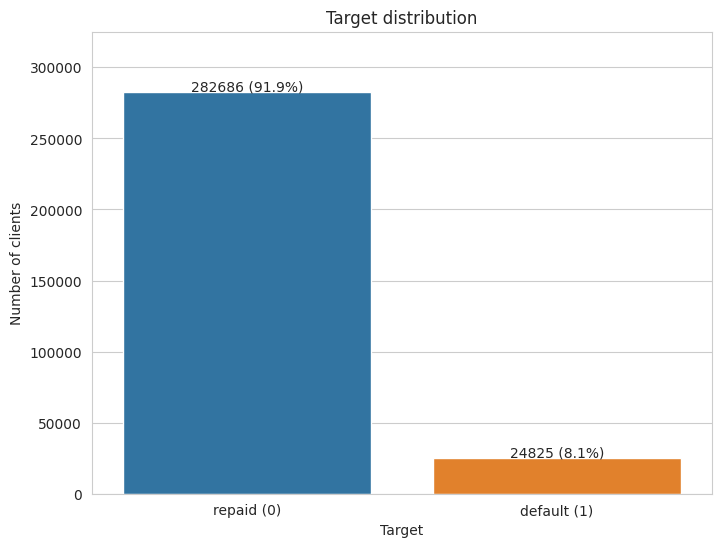

In [7]:
target_counts = df['TARGET'].value_counts()
target_pct = df['TARGET'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, ax=ax, legend=False)

for i, (count, pct) in enumerate(zip(target_counts.values, target_pct.values)):
    ax.text(i, count + 1000, f'{count} ({pct:.1f}%)', ha='center')

ax.set_xlabel('Target')
ax.set_ylabel('Number of clients')
ax.set_ylim(0, max(target_counts.values) * 1.15)
ax.set_title('Target distribution')
ax.set_xticks([0, 1])
ax.set_xticklabels(['repaid (0)', 'default (1)'])
plt.show()

Default means that the client had late payment more than 30 days on at least one of the first number of installments of the loan. Repaid means that the client repaid the loan on time.

There is a big imbalance in our dataset so we will need to handle this situation.

# Columns analysis

### Credit amount

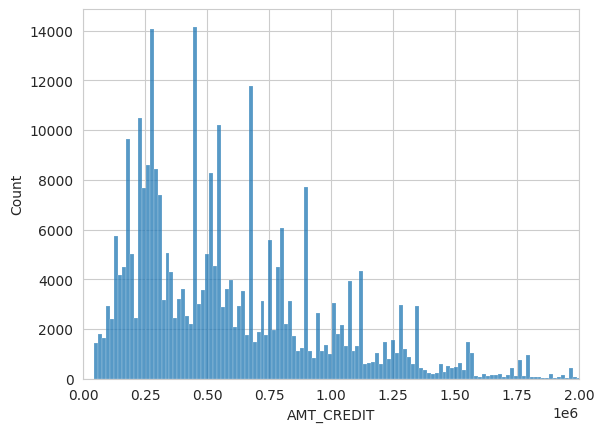

In [8]:
sns.histplot(df['AMT_CREDIT'])
plt.xlim(0, 2e6)
plt.show()

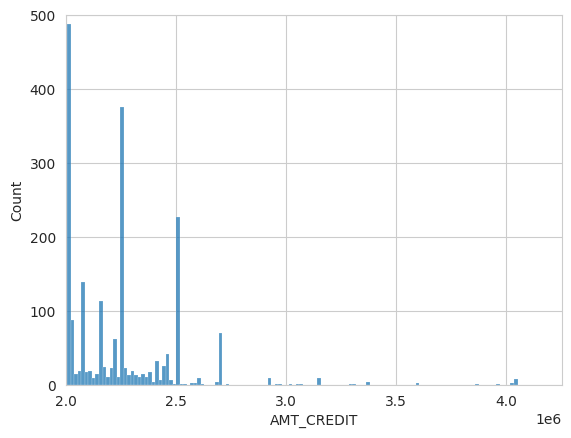

In [9]:
sns.histplot(df['AMT_CREDIT'])
plt.xlim(2e6)
plt.ylim(0, 500)
plt.show()

In [10]:
len(df)

307511

In [11]:
np.sum(df['AMT_CREDIT'] > 2e6)

np.int64(2029)

In [12]:
np.round(np.sum(df['AMT_CREDIT'] > 2e6) / len(df), 4) * 100

np.float64(0.66)

In my opinion we should treat home loans above 2 million as special cases. Less than 1% of people take these.

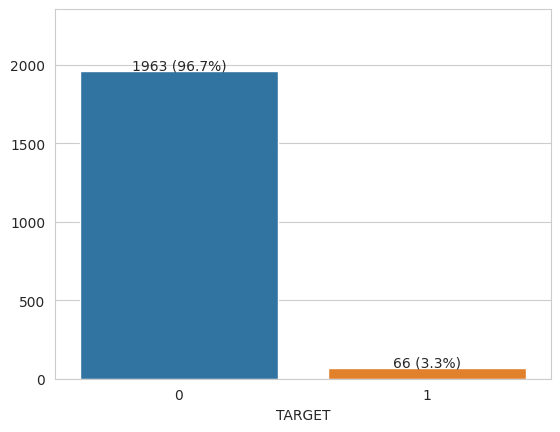

In [13]:
res = df[df['AMT_CREDIT'] > 2e6]['TARGET'].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=res.index, y=res.values, hue=res.index, ax=ax, legend=False)

for i, count in enumerate(res.values):
    pct = (count / res.sum()) * 100
    ax.text(i, count + 10, f'{count} ({pct:.1f}%)', ha='center')

plt.ylim(0, res.values.max() * 1.2)
plt.show()

97% of loans above 2 millions don't have any difficulties paying credit off.

Compared to 92% on everyone this is better.

### Credit amount vs Income

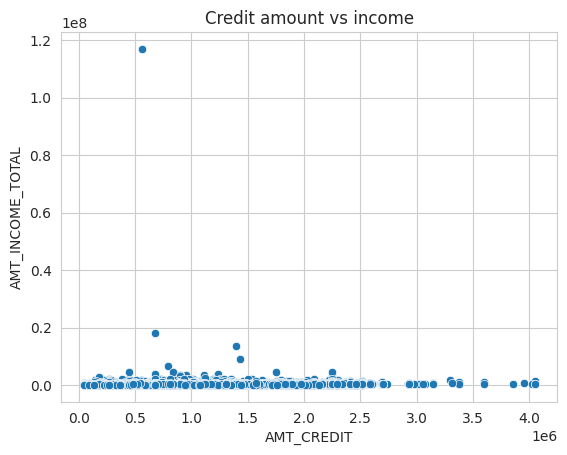

In [15]:
sns.scatterplot(df, x='AMT_CREDIT', y="AMT_INCOME_TOTAL")
plt.title('Credit amount vs income')
plt.show()

There are some outstanding values. Let's remove them.

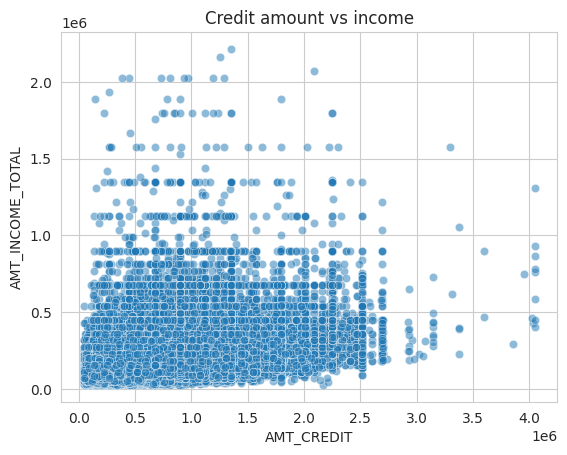

In [16]:
df_no_outliers = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.9999)]

sns.scatterplot(df_no_outliers, x='AMT_CREDIT', y="AMT_INCOME_TOTAL", alpha=0.5)
plt.title('Credit amount vs income')
plt.show()

There is no visible relation between these two.

In [33]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


### Credit amount / income vs target

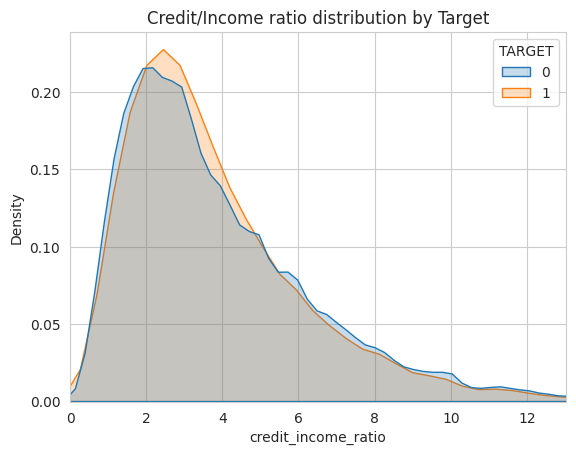

In [32]:
df['credit_income_ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

sns.kdeplot(data=df, x='credit_income_ratio', hue='TARGET', common_norm=False, fill=True)
plt.xlim(0, df['credit_income_ratio'].quantile(0.99))
plt.title('Credit/Income ratio distribution by Target')
plt.show()

There is no benefit from this.

### Annuity vs income

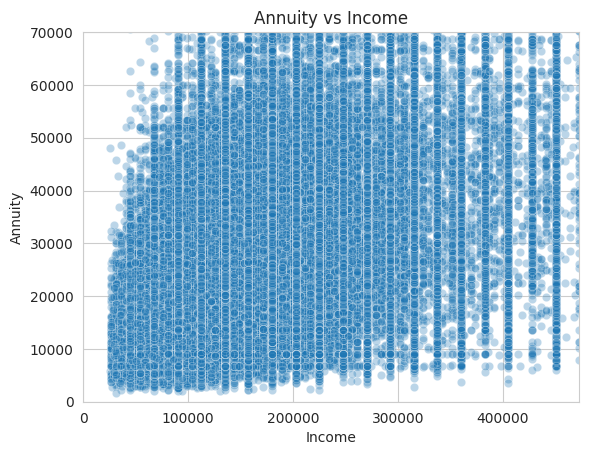

In [47]:
sns.scatterplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', alpha=0.3)
plt.xlim(0, df['AMT_INCOME_TOTAL'].quantile(0.99))
plt.ylim(0, df['AMT_ANNUITY'].quantile(0.99))
plt.title('Annuity vs Income')
plt.xlabel('Income')
plt.ylabel('Annuity')
plt.show()

In [48]:
df[['AMT_INCOME_TOTAL', 'AMT_ANNUITY']].corr()

,AMT_INCOME_TOTAL,AMT_ANNUITY
AMT_INCOME_TOTAL,1.000000,0.191657
AMT_ANNUITY,0.191657,1.000000


There is some relation but it is not strong.

### Days employed

In [17]:
df['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11707         1
-13385         1
-9985          1
-9672          1
-14232         1
Name: count, Length: 12574, dtype: int64

There is an issue with values around 350000(958 years) of employment. It means that currently somebody is unemployed or is retired and needs to be handles separately.

There are negative values because it is relative to loan application. For example if somebody employed for 200 days when filling in the application then the value is -200.

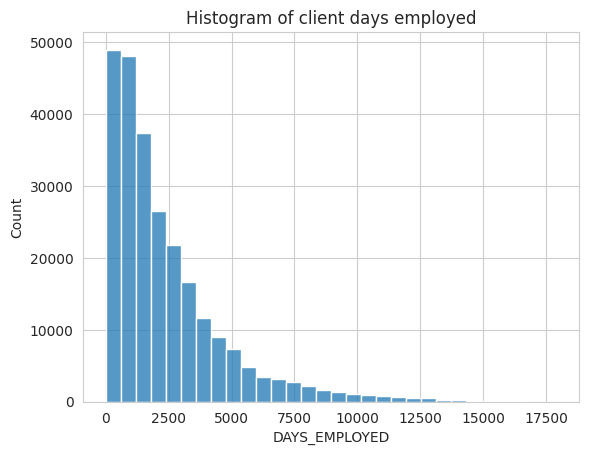

In [18]:
res = df[df['DAYS_EMPLOYED'] < 0]

sns.histplot(res['DAYS_EMPLOYED'] * -1, bins=30)
plt.title('Histogram of client days employed')
plt.show()

### Days employed vs target

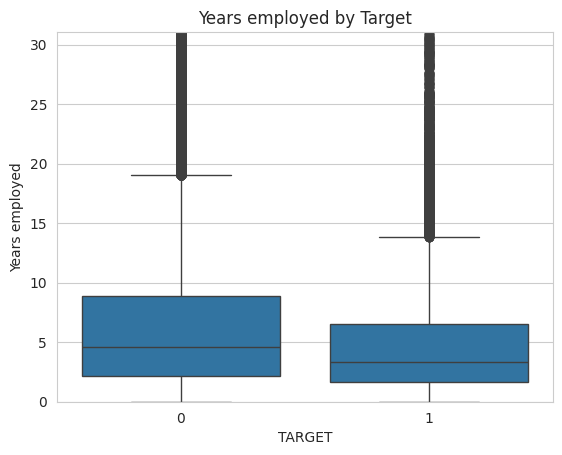

In [34]:
employed_df = df[df['DAYS_EMPLOYED'] < 0].copy()
employed_df['YEARS_EMPLOYED'] = employed_df['DAYS_EMPLOYED'] / -365

sns.boxplot(data=employed_df, x='TARGET', y='YEARS_EMPLOYED')
plt.ylim(0, employed_df['YEARS_EMPLOYED'].quantile(0.99))
plt.title('Years employed by Target')
plt.ylabel('Years employed')
plt.show()

### Days employed anomaly vs target

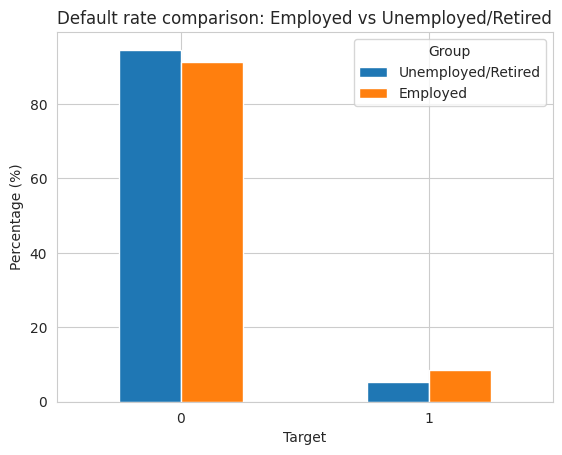

In [44]:
unemployed_df = df[df['DAYS_EMPLOYED'] == 365243]

comparison = pd.DataFrame({
    'Unemployed/Retired': df[df['DAYS_EMPLOYED'] == 365243]['TARGET'].value_counts(normalize=True) * 100,
    'Employed': df[df['DAYS_EMPLOYED'] < 0]['TARGET'].value_counts(normalize=True) * 100
})

comparison.plot(kind='bar')
plt.title('Default rate comparison: Employed vs Unemployed/Retired')
plt.ylabel('Percentage (%)')
plt.xlabel('Target')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

Unemployed people have less problems with paying of loans.

### Days birth

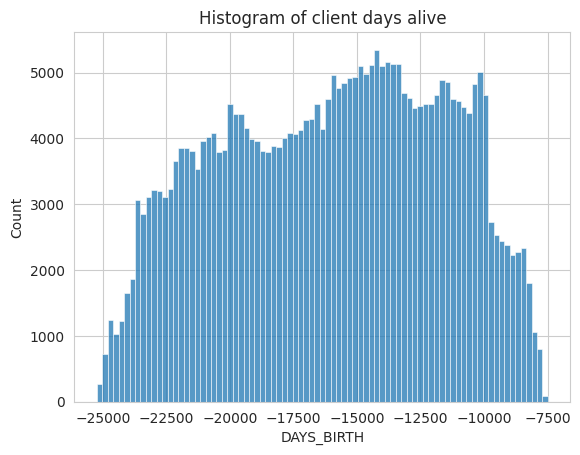

In [21]:
sns.histplot(df['DAYS_BIRTH'])
plt.title('Histogram of client days alive')
plt.show()

I don't think we need to have days here. We could make a feature that is how old is somebody.

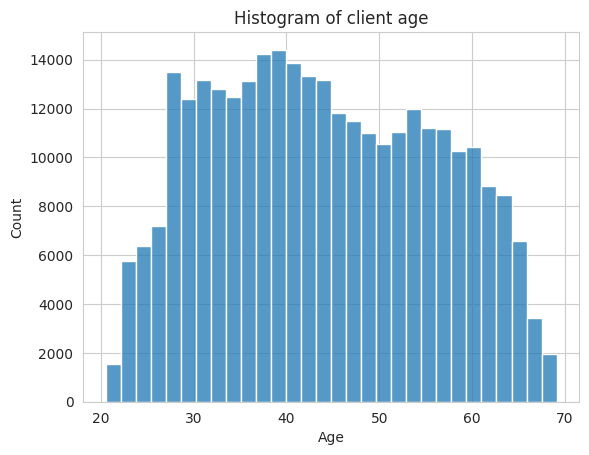

In [22]:
sns.histplot(df['DAYS_BIRTH'] / -365, bins=30)
plt.title('Histogram of client age')
plt.xlabel('Age')
plt.show()

### Days employed percent

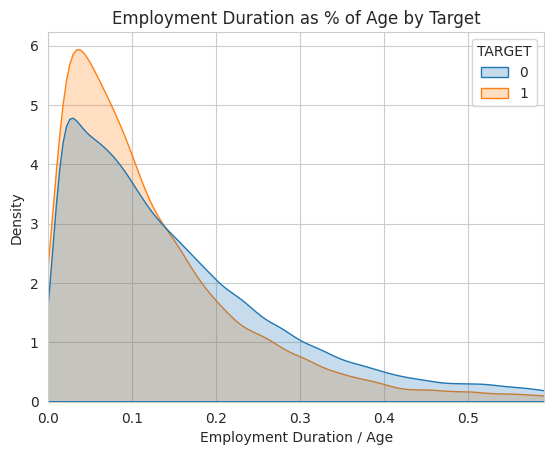

In [50]:
employed_df = df[df['DAYS_EMPLOYED'] < 0].copy()
employed_df['DAYS_EMPLOYED_PERCENT'] = employed_df['DAYS_EMPLOYED'] / employed_df['DAYS_BIRTH']

sns.kdeplot(data=employed_df, x='DAYS_EMPLOYED_PERCENT', hue='TARGET', common_norm=False, fill=True)
plt.xlim(0, employed_df['DAYS_EMPLOYED_PERCENT'].quantile(0.99))
plt.title('Employment Duration as % of Age by Target')
plt.xlabel('Employment Duration / Age')
plt.show()

The longer somebody works the higher probability of payment. Lots of people working for short periods of life wants credits.

### Income per person

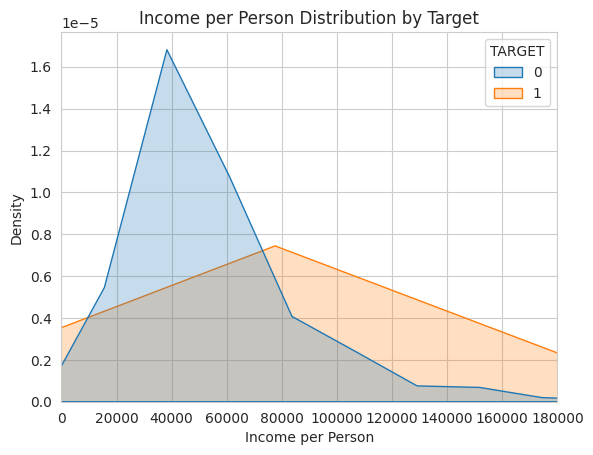

In [51]:
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_FAM_MEMBERS'])

sns.kdeplot(data=df, x='INCOME_PER_PERSON', hue='TARGET', common_norm=False, fill=True)
plt.xlim(0, df['INCOME_PER_PERSON'].quantile(0.99))
plt.title('Income per Person Distribution by Target')
plt.xlabel('Income per Person')
plt.show()

### External source credit score

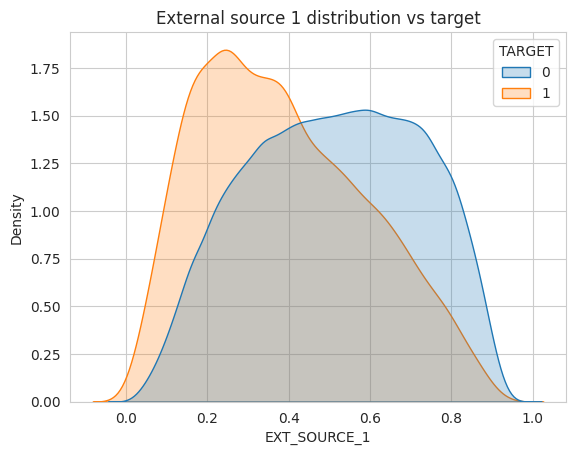

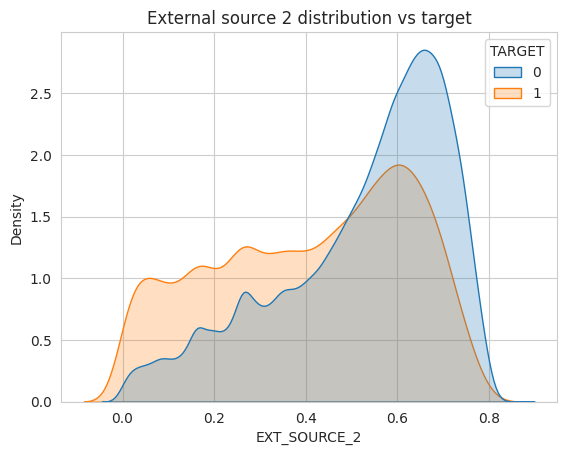

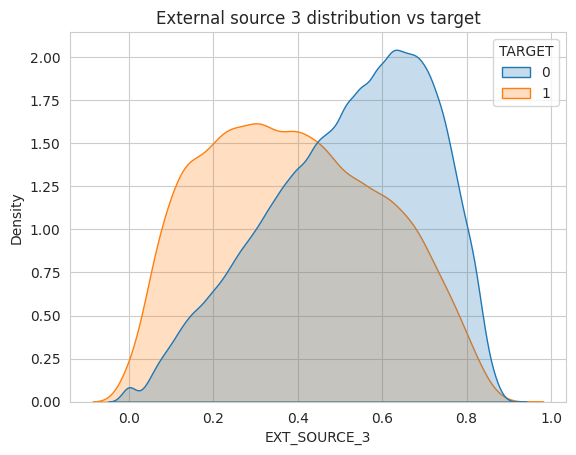

In [28]:
for i in range(1, 4):
    sns.kdeplot(data=df, x=f'EXT_SOURCE_{i}', hue='TARGET', common_norm=False, fill=True)
    plt.title(f'External source {i} distribution vs target')
    plt.show()

These variables are important, as they provide us with quite reliable way to predict target. Probably will be the most important features.

In [45]:
for i in range(1, 4):
    missing_count = df[f'EXT_SOURCE_{i}'].isna().sum()
    missing_pct = (df[f'EXT_SOURCE_{i}'].isna().mean() * 100).round(2)
    print(f'EXT_SOURCE_{i}: {missing_count} missing values ({missing_pct}%)')

EXT_SOURCE_1: 173378 missing values (56.38%)
EXT_SOURCE_2: 660 missing values (0.21%)
EXT_SOURCE_3: 60965 missing values (19.83%)


Missing external credit score could mean somebody has never taken a credit.

### Potential features

INCOME_PER_PERSON: AMT_INCOME_TOTAL / (1 + CNT_FAM_MEMBERS)

CREDIT_TO_INCOME_RATIO: AMT_CREDIT / AMT_INCOME_TOTAL

ANNUITY_TO_INCOME_RATIO: AMT_ANNUITY / AMT_INCOME_TOTAL

ALL_CREDITS_TO_INCOME_RATIO: all AMT_ANNUITY / AMT_INCOME_TOTAL (bureau.csv)

DAYS_EMPLOYED_PERCENT: DAYS_EMPLOYED / DAYS_BIRTH

Some kind of feature on EXT_SOURCE_i. Maybe product, std or mean.